In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
wine = pd.read_csv("wine.csv", sep=',')

In [3]:
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine.tail()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [6]:
wine.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [7]:
bins = (0, 4.5, 7.5, 20)
group_names = ['light', "moderate", 'intense']
wine['Color intensity'] = pd.cut(wine['Color intensity'], bins = bins, labels= group_names)
wine['Color intensity'].unique()

['moderate', 'light', 'intense']
Categories (3, object): ['light' < 'moderate' < 'intense']

In [8]:
label_color_intensity = LabelEncoder()

In [9]:
wine['Color intensity'] = label_color_intensity.fit_transform(wine['Color intensity'])

In [10]:
wine.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,2,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,1,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,2,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,0,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,1,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,2,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,2,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,2,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,2,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,2,1.01,3.55,1045


In [11]:
wine['Color intensity'].value_counts()

1    84
2    67
0    27
Name: Color intensity, dtype: int64

C:\Users\Dawid\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Color intensity', ylabel='count'>

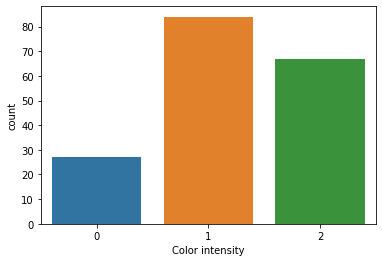

In [12]:
sns.countplot(wine['Color intensity'])

In [16]:
X = wine.drop('Color intensity', axis=1)
y = wine['Color intensity']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
X_train[:10]

array([[ 1.33941122,  1.66529275, -0.60840587,  1.21896194,  1.60540017,
        -0.16738426,  0.80400157, -0.6916784 ,  1.26722552,  1.8775398 ,
        -1.65632857, -0.87940904, -0.24860607],
       [ 1.33941122, -0.54952506,  2.7515415 ,  1.00331502,  1.60540017,
        -0.30437887, -0.78538376, -1.40123291,  2.04959953, -0.87350523,
        -0.58463272, -1.25462095, -0.72992237],
       [ 0.0455582 , -0.74531007, -1.14354109, -0.93750727, -0.28270426,
        -0.8523573 ,  1.93702874,  1.7467906 , -1.00165913,  0.58798744,
         0.35845962,  0.2462267 , -0.24860607],
       [ 1.33941122,  0.61294837, -0.61717858,  1.00331502,  0.87920616,
        -0.78385999,  0.4892718 , -0.90154664,  1.18898812,  1.17258451,
        -1.65632857, -1.12955031, -0.38138298],
       [-1.24829481,  0.11124931, -0.76631462, -0.93750727, -1.15413707,
        -0.16738426,  0.17454204,  0.63748708, -0.68870952, -0.40926638,
         0.95860929,  0.1350528 ,  0.94638614],
       [ 0.0455582 , -0.928858

In [20]:
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,2,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,1,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,2,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,0,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,1,1.04,2.93,735


#Random Forest Classifier

In [21]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train.values)
pred_rfc = rfc.predict(X_test)

In [22]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.81      0.93      0.87        14
           2       0.87      0.76      0.81        17

    accuracy                           0.81        36
   macro avg       0.76      0.76      0.76        36
weighted avg       0.81      0.81      0.80        36

[[ 3  0  2]
 [ 1 13  0]
 [ 1  3 13]]


#SVM Classifier

In [23]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [24]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.81      0.93      0.87        14
           2       0.81      0.76      0.79        17

    accuracy                           0.78        36
   macro avg       0.71      0.70      0.70        36
weighted avg       0.77      0.78      0.77        36

[[ 2  0  3]
 [ 1 13  0]
 [ 1  3 13]]


Neural Network

In [25]:
mlpc = MLPClassifier(hidden_layer_sizes=(12,12,12), max_iter=1000)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [26]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.71      0.86      0.77        14
           2       0.67      0.59      0.62        17

    accuracy                           0.64        36
   macro avg       0.54      0.55      0.54        36
weighted avg       0.62      0.64      0.63        36

[[ 1  0  4]
 [ 1 12  1]
 [ 2  5 10]]


In [27]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)
cm

0.8055555555555556

In [28]:
wine.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,2,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,1,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,2,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,0,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,1,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,2,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,2,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,2,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,2,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,2,1.01,3.55,1045


In [37]:
Xnew = [[3,11.92,2.79,2.82,27,94,2.51,.66,.48,.80,.83,2.29,615]]
Xnew = sc.transform(Xnew)
ynew = rfc.predict(Xnew)
ynew

C:\Users\Dawid\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2])